# CEE 498: Transportation Economics
## Assignment Six: Monocentric City Model
### Noah Garfinkle (garfink2@illinois edu)
### 29 April 2020

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Consider a monocentric city in which the cost of commuting to the city center is given by $tx$, where $x$ is the distance to the city center and $t$ is the cost of travel per unit distance.  Residents are all the same and have utility functions given by

$$u(h,z)=h^\alpha z^{1-\alpha}$$

where $h$ is the floorspace per resident, $z$ is consumption of the numeraire and $\alpha$ is a parameter such that $0<\alpha<1$.  In equilibrium, every resident achieves the same utility $\bar{u}$.

Developers build on the land by building floorspace, $f$. The cost of building $f$ floorspace on 1 unit area of land is

$$TC(f)=cf^{\frac{1}{\beta}}$$

where $0<\beta<1$.

In [49]:
u = 3.0
α = 0.45
β = 2.0/3.0
πa = 1.0
c = 0.6
t = 0.25
Y = 10.0

In [50]:
xs = np.linspace(0,35,100)

## Problem One

Derive symbolic expressions for the following functions in equilibrium, for the developed part of the city. Reduce the functions as much as possible.

### (a) $\bar{p}(x)$, the equilibrium price of one unit of floorspace at $x$.

Assume, per the course lecture, that the budget constraint is 

$$Y-tx=hp(x)+z$$

If we accept that every resident achieves the same utility, then we can solve for $\bar{p}(x)$ by substituting the budget constriant into the utility function and solving for the first order condition.

$$u(h,Y-tx-ph)=h^\alpha(Y-tx-ph)^{1-\alpha}$$

We now chose $h$ to maximize utility conditional on $p$ and $x$.

$$\frac{\delta u}{\delta h} = 0$$

$$\therefore ph^*=\alpha(Y-tx)$$

$$\therefore h^* = \frac{\alpha(Y-tx)}{p}$$

We can now plug $h^*$ back into the constant utility function, such that

$$u(h^*,Y-tx-ph)=\frac{\alpha(Y-tx)}{p}^\alpha(Y-tx-p\left(\frac{\alpha(Y-tx)}{p}\right))^{1-\alpha}$$

$$p_{equilibrium}=\left[\frac{\phi(Y-tx)}{\bar{u}}\right]^{\frac{1}{\alpha}}$$

where $\phi=\alpha^\alpha(1-\alpha)^{1-\alpha}$

In [7]:
def p(x,α,Y,t,u):
    ϕ = np.power(α,α) * np.power((1 - α),(1 - α))
    toReturn = np.power(ϕ*(Y-t*x)/u,1.0/α)
    return toReturn

Text(0.5, 1.0, '$\\bar{p}(x)$')

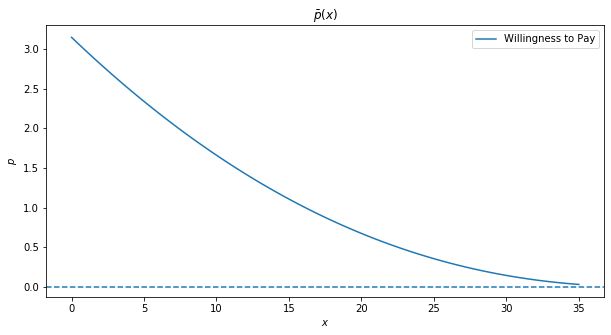

In [52]:
ps = [p(x,α,Y,t,u) for x in xs]
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(xs,ps,label="Willingness to Pay")
ax.axhline(0.0,ls="--")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$p$")
ax.set_title("$\\bar{p}(x)$")

### (b) $\bar{h}(x)$, the equilibrium size of a housing unit at $x$.

The bid rent can be used to determine house size. Per our previous analyses,

$$\therefore h^* = \frac{\alpha(Y-tx)}{p}$$

and

$$p_{equilibrium}=\left[\frac{\phi(Y-tx)}{\bar{u}}\right]^{\frac{1}{\alpha}}$$

where $\phi=\alpha^\alpha(1-\alpha)^{1-\alpha}$

As such, 

$$\bar{h} = \frac{\alpha(Y-tx)}{\left[\frac{\phi(Y-tx)}{\bar{u}}\right]^{\frac{1}{\alpha}}}$$


In [20]:
def h(x,α,Y,t,u):
    toReturn = α * (Y-t*x)
    toReturn /= p(x,α,Y,t,u)
    return toReturn

Text(0.5, 1.0, '$\\bar{h}(x)$')

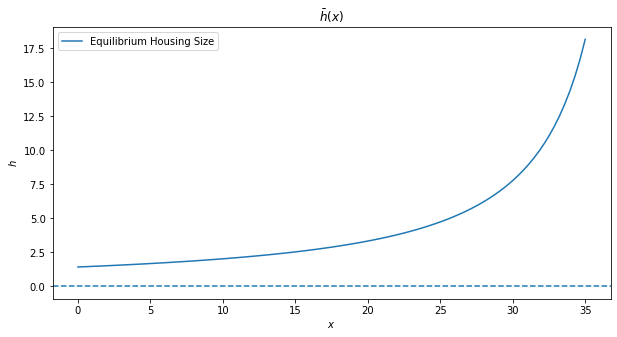

In [53]:
hs = [h(x,α,Y,t,u) for x in xs]
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(xs,hs,label="Equilibrium Housing Size")
ax.axhline(0.0,ls="--")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$h$")
ax.set_title("$\\bar{h}(x)$")

### (c) $\bar{f}(x)$, the equilibrium density of floorspace at $x$ (the floorspace built per unit of land).

$$TC(f)=cf^{\frac{1}{\beta}}$$


Per the course lecture, take the derivitive to calculate marginal cost, and set this equal to the bid rent at that location. 

$$\pi=fp-cf^{\frac{1}{\beta}}$$

Set $\frac{\delta\pi}{\delta f}=0$

$$\therefore f^*=\left( \frac{p_{equilibrium}\beta}{c} \right)^{\frac{\beta}{1-\beta}}$$

We can then substitute our bid rent found in part a to find the equilibrium floor space at a location $x$. 

$$p_{equilibrium}=\left[\frac{\phi(Y-tx)}{\bar{u}}\right]^{\frac{1}{\alpha}}$$

where $\phi=\alpha^\alpha(1-\alpha)^{1-\alpha}$

In [42]:
def f(x,α,Y,t,u,β,c):
    toReturn = np.power(p(x,α,Y,t,u)*β/c,β/(1-β))
    return toReturn

Text(0.5, 1.0, '$\\bar{f}(x)$')

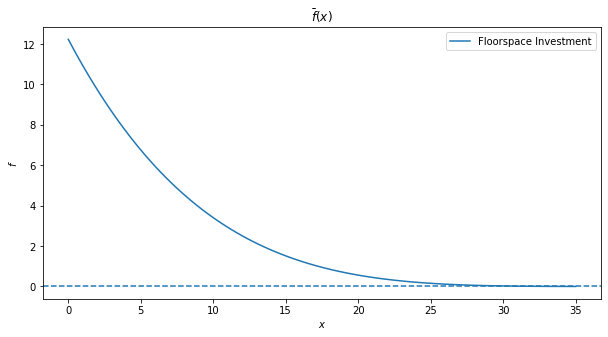

In [55]:
fs = [f(x,α,Y,t,u,β,c) for x in xs]
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(xs,fs,label="Floorspace Investment")
ax.axhline(0.0,ls="--")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$f$")
ax.set_title("$\\bar{f}(x)$")

### (d) $\bar{d}(x)$, the equilibrium population density at $x$.

We can approach this by dividing the density of floorspace by the house size, such that

$$\bar{d}(x) = \frac{\left( \frac{p_{equilibrium}\beta}{c} \right)^{\frac{\beta}{1-\beta}}}{\frac{\alpha(Y-tx)}{p_{equilibrium}}}$$

$$\therefore \bar{d}(x) = \frac{p_{equilibrium}\left( \frac{p_{equilibrium}\beta}{c} \right)^{\frac{\beta}{1-\beta}}}{\alpha(Y-tx)}$$


In [43]:
def d(x,α,Y,t,u,β,c):
    toReturn = p(x,α,Y,t,u) * np.power(p(x,α,Y,t,u)*β/c,β/(1.0-β))
    toReturn /= α*(Y-t*x)
    return toReturn

Text(0.5, 1.0, '$\\bar{d}(x)$')

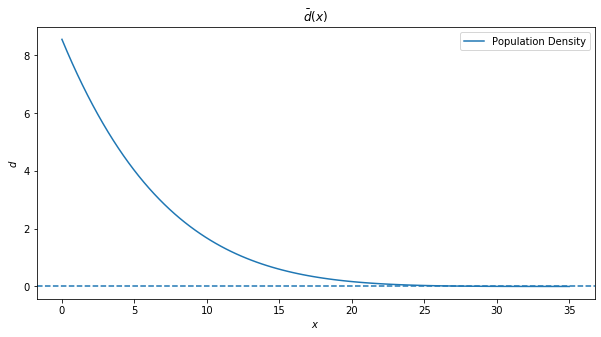

In [57]:
ds = [d(x,α,Y,t,u,β,c) for x in xs]
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(xs,ds,label="Population Density")
ax.axhline(0.0,ls="--")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$d$")
ax.set_title("$\\bar{d}(x)$")

### (e) $\bar{\pi}(x)$, the equilibrium profit per unit of land at $x$.

$$\pi=\bar{f}\bar{p}-c\bar{f}^{\frac{1}{\beta}}$$

where $f$ and $p$ are both functions of of $x$.

$$\bar{f}=\left( \frac{p_{equilibrium}\beta}{c} \right)^{\frac{\beta}{1-\beta}}$$

$$\bar{p}=\left[\frac{\phi(Y-tx)}{\bar{u}}\right]^{\frac{1}{\alpha}}$$

where $\phi=\alpha^\alpha(1-\alpha)^{1-\alpha}$

In [48]:
def π(x,α,Y,t,u,β,c):
    toReturn = f(x,α,Y,t,u,β,c) * p(x,α,Y,t,u) - c * np.power(f(x,α,Y,t,u,β,c),1.0/β)
    return toReturn

Text(0.5, 1.0, '$\\bar{\\pi}(x)$')

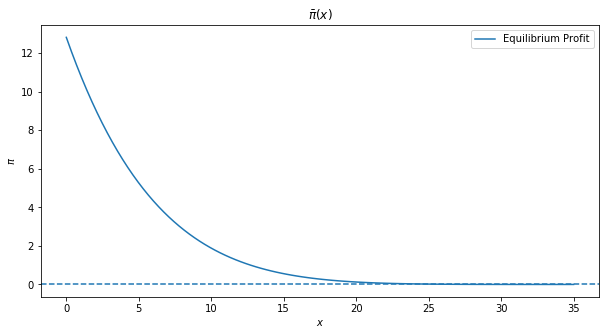

In [59]:
πs = [π(x,α,Y,t,u,β,c) for x in xs]
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(xs,πs,label="Equilibrium Profit")
ax.axhline(0.0,ls="--")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$\pi$")
ax.set_title("$\\bar{\pi}(x)$")

## Problem Two

For this question you will have to numerically solve the model. Suppose that the parameters have the values:
- $\bar{u}=3$
- $\alpha=0.45$
- $\beta=\frac{2}{3}$
- $\pi_\alpha=1$
- $c=0.6$
- $t=0.25$
- $Y=10$

### (a) How far does the city extend? That is, what is the distance $x_a$ where development ends?

Per the course lecture, "the city will extend from $x=0$ to $x_a$ where $\bar{\pi}(x_a)=\pi_a$.

### (b) What is the equilibrium population of the city?

$$\int_0^{x_a}{\frac{\bar{f}(x)}{\bar{h}(x)}2 \pi x \delta x}$$

Note- The circumference of rings is $2\pi x$, please do not read this $\pi$ as profit.